In [29]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

## SDOT Bike Counter Data: 


https://data.seattle.gov/browse?category=Transportation&limitTo=datasets&q=&sortBy=relevance&page=1


In [38]:
bike= pd.read_csv("Data/Fremont_Bridge_Bicycle_Counter.csv", sep=',')
bike.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [41]:
bike.Date= pd.to_datetime(bike.Date)

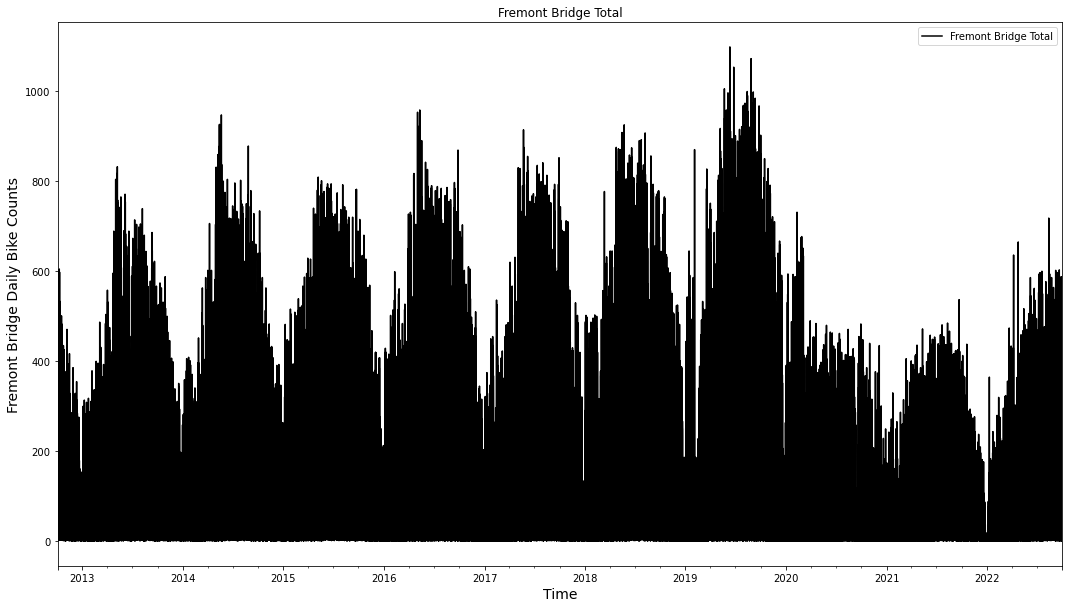

In [42]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Fremont Bridge Total')

bike.plot(x='Date', y='Fremont Bridge Total',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Fremont Bridge Daily Bike Counts",color='k',fontsize=14);


## Outdoor weather observations recorded at Seattle-Tacoma International Airport: 
https://download.synopticdata.com/#a/KSEA

In [19]:
out= pd.read_csv("Data/KSEA.csv", sep=',', header=[10])
out.head()

/Users/amandaworthy/opt/anaconda3/envs/uwgda2022/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,air_temp_high_6_hour_set_1,air_temp_low_6_hour_set_1,peak_wind_speed_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,pressure_set_1d,weather_condition_set_1d
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,Millimeters,Millimeters,Millimeters,Millimeters,Millimeters,Celsius,Celsius,m/s,Celsius,Celsius,Degrees,Pascals,code
1,KSEA,2010-10-26T12:11:00Z,7.0,81.2,6.69,180.0,11.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940.83,NaN
2,KSEA,2010-10-26T12:49:00Z,7.0,81.2,7.2,190.0,NaN,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97973.66,NaN
3,KSEA,2010-10-26T12:53:00Z,7.2,79.54,8.23,190.0,11.32,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940.83,NaN
4,KSEA,2010-10-26T13:53:00Z,7.2,79.54,8.23,180.0,10.8,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98006.5,NaN


In [20]:
out.describe()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,air_temp_high_6_hour_set_1,air_temp_low_6_hour_set_1,peak_wind_speed_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,pressure_set_1d,weather_condition_set_1d
count,691184,691184,688864.0,688826.0,686943.00,684167.0,22135.0,174.0,69496.000,4328.000,5405.000,1896.000,17329.0,17331.0,2350.00,4310.0,4310.0,1679.0,689184.00,117536
unique,1,691176,302.0,4187.0,66.00,75.0,71.0,14.0,86.000,104.000,158.000,243.000,161.0,137.0,49.00,139.0,102.0,31.0,598.00,90
top,KSEA,2020-09-03T12:00:00Z,8.0,100.0,2.57,0.0,10.8,50.8,0.254,0.025,0.025,0.254,10.0,7.2,13.38,10.0,7.2,210.0,100232.94,light rain
freq,691184,2,39036.0,13487.0,78075.00,51873.0,1926.0,41.0,20916.000,874.000,881.000,150.000,550.0,508.0,352.00,121.0,139.0,307.0,15829.00,46550


In [21]:
list(out.columns)

['Station_ID',
 'Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'wind_speed_set_1',
 'wind_direction_set_1',
 'wind_gust_set_1',
 'snow_depth_set_1',
 'precip_accum_one_hour_set_1',
 'precip_accum_three_hour_set_1',
 'precip_accum_six_hour_set_1',
 'precip_accum_24_hour_set_1',
 'air_temp_high_6_hour_set_1',
 'air_temp_low_6_hour_set_1',
 'peak_wind_speed_set_1',
 'air_temp_high_24_hour_set_1',
 'air_temp_low_24_hour_set_1',
 'peak_wind_direction_set_1',
 'pressure_set_1d',
 'weather_condition_set_1d']

In [22]:
out= out.drop(0,axis=0)

In [23]:
out.Date_Time= pd.to_datetime(out.Date_Time)

cols = out.columns.drop(['Date_Time','wind_direction_set_1'])

out[cols] = out[cols].apply(pd.to_numeric, errors='coerce')

out.head(5)

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,air_temp_high_6_hour_set_1,air_temp_low_6_hour_set_1,peak_wind_speed_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,pressure_set_1d,weather_condition_set_1d
1,NaN,2010-10-26 12:11:00+00:00,7.0,81.20,6.69,180.0,11.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940.83,NaN
2,NaN,2010-10-26 12:49:00+00:00,7.0,81.20,7.20,190.0,NaN,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97973.66,NaN
3,NaN,2010-10-26 12:53:00+00:00,7.2,79.54,8.23,190.0,11.32,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940.83,NaN
4,NaN,2010-10-26 13:53:00+00:00,7.2,79.54,8.23,180.0,10.80,NaN,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98006.50,NaN
5,NaN,2010-10-26 14:07:00+00:00,8.0,75.84,9.26,180.0,13.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97973.66,NaN


In [24]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691184 entries, 1 to 691184
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   Station_ID                     0 non-null       float64            
 1   Date_Time                      691184 non-null  datetime64[ns, UTC]
 2   air_temp_set_1                 688863 non-null  float64            
 3   relative_humidity_set_1        688825 non-null  float64            
 4   wind_speed_set_1               686942 non-null  float64            
 5   wind_direction_set_1           684166 non-null  object             
 6   wind_gust_set_1                22134 non-null   float64            
 7   snow_depth_set_1               173 non-null     float64            
 8   precip_accum_one_hour_set_1    69495 non-null   float64            
 9   precip_accum_three_hour_set_1  4327 non-null    float64            
 10  precip_a

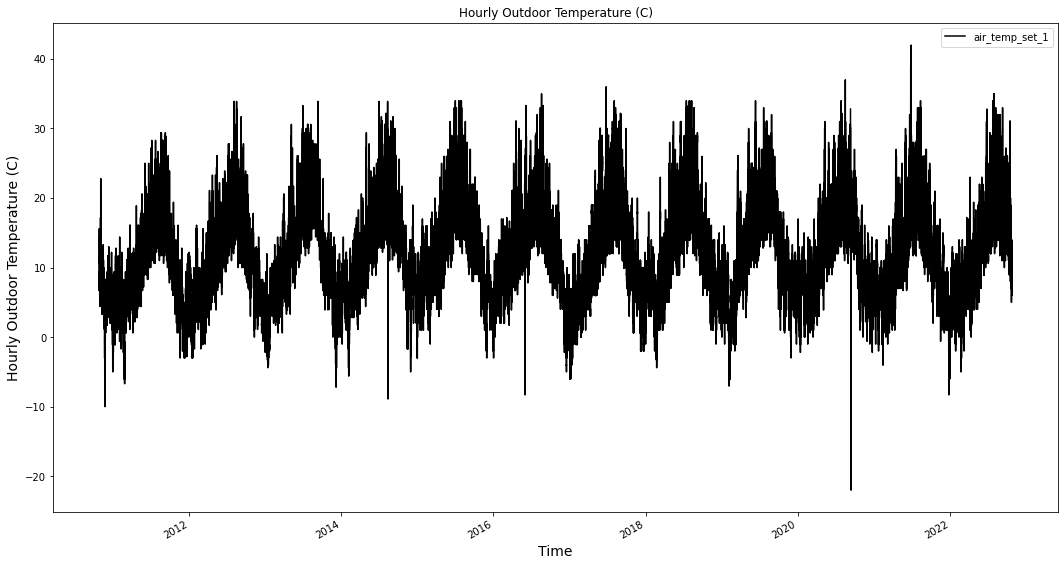

In [25]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Outdoor Temperature (C)')

out.plot(x='Date_Time', y='air_temp_set_1',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Outdoor Temperature (C)",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();

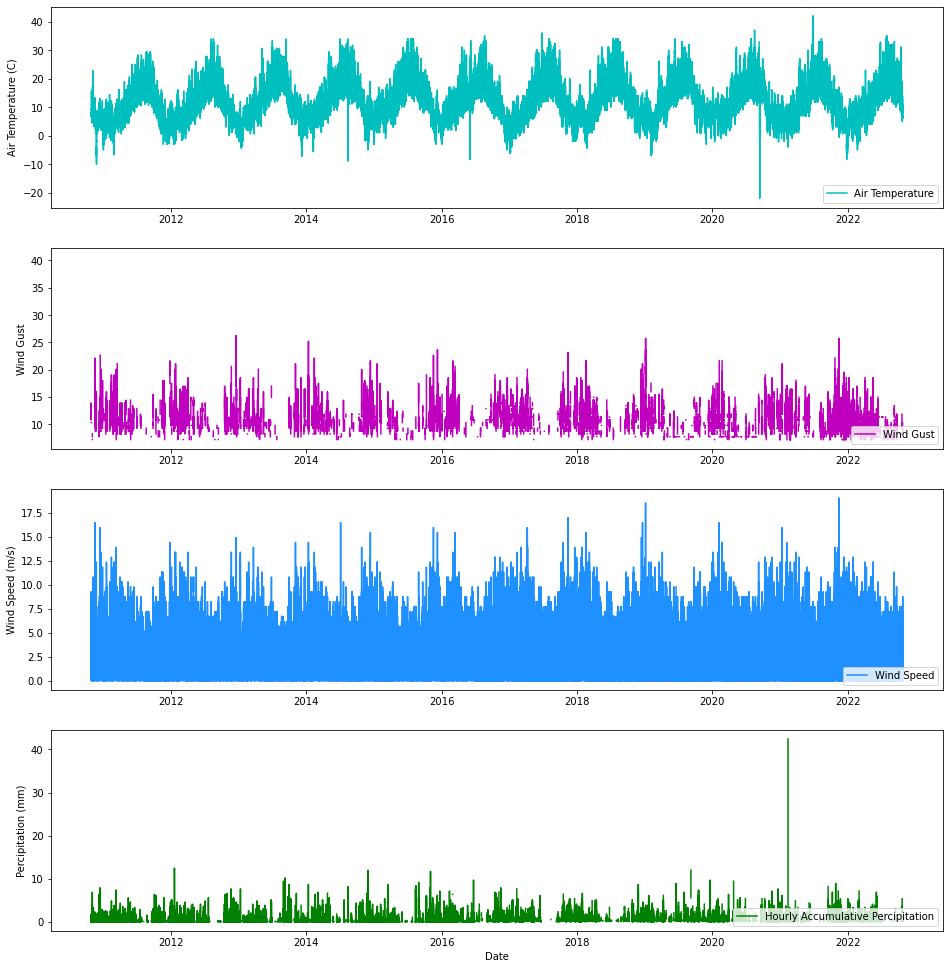

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(16,17))

x1 = out['Date_Time']
y1 = out['air_temp_set_1']

ax1.plot(x1, y1, label = "Air Temperature", color='c', markerfacecolor='white')



#Axis Labels 
ax1.set_ylabel('Air Temperature (C)')


x2 = out['Date_Time']
y2 = out['wind_gust_set_1']

ax2.plot(x2, y2, label = "Wind Gust", color='m',  markerfacecolor='white')

#Axis Labels 
ax2.set_ylabel('Wind Gust')
#ax2.set_title('Monthy Mean Air Temperature at Pirbadet')


x3 = out['Date_Time']
y3 = out['wind_speed_set_1']

ax3.plot(x3, y3, label = "Wind Speed", color='dodgerblue', markerfacecolor='white')


#Axis Labels 
ax3.set_ylabel('Wind Speed (m/s)')
#ax3.set_xlabel('Date')
#ax3.set_title('Monthy Degre Day at Pirbadet')
# show a legend on the plot

ax2.legend(loc='lower right')


ax1.legend(loc='lower right')
ax3.legend(loc='lower right')


x4 = out['Date_Time']
y4 = out['precip_accum_one_hour_set_1']

ax4.plot(x4, y4, label = "Hourly Accumulative Percipitation", color='g',  markerfacecolor='white')
#axs.set_xlim(pd.Timestamp('2007-12-01 00:00'), pd.Timestamp('2022-05-01 00:00'))
#ax4.set_xlim(pd.Timestamp('2014-11-01 00:00'), pd.Timestamp('2022-05-01 00:00'))


#Axis Labels 
ax4.set_ylabel('Percipitation (mm)')
ax4.set_xlabel('Date')


# show a legend on the plot

ax4.legend(loc='lower right')

# Display a figure.
plt.show()